In [1]:
from sklearn import datasets
import numpy as np, seaborn as sns, matplotlib.pyplot as plt

In [2]:
# forming a binary classification dataset
X, y = datasets.make_blobs(n_samples=500, centers=[[1, 1], [10, 10]], n_features=2, center_box=(0, 10), cluster_std=2)
y[y==0] = -1
X.shape, y.shape

((500, 2), (500,))

In [3]:
# visualize the dataset
def plot_dataset(X, y, w=None, w0=None, plot_line=False):

    plt.figure(figsize=(20, 7))

    sns.despine()
    sns.set_style('white')
    sns.set_context('paper')

    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, legend=False)

    if plot_line:

        x_axis = np.arange(int(X[:, 0].min()), int(X[:, 0].max()))
        y_axis = -1 * (w[0] * x_axis + w0) / w[1]

        sns.lineplot(x=x_axis, y=y_axis)

    plt.title(f'The DataSet', **{'fontname': 'monospace'})

    plt.xticks(**{'fontname': 'monospace'})
    plt.yticks(**{'fontname': 'monospace'})

    plt.xlim([X[:, 0].min() - 1, X[:, 0].max() + 1])
    plt.ylim([X[:, 1].min() - 1, X[:, 1].max() + 1])

    plt.show()

    return None

w: [-0.50384617  0.85210312],
w0: -0.11885486784268745


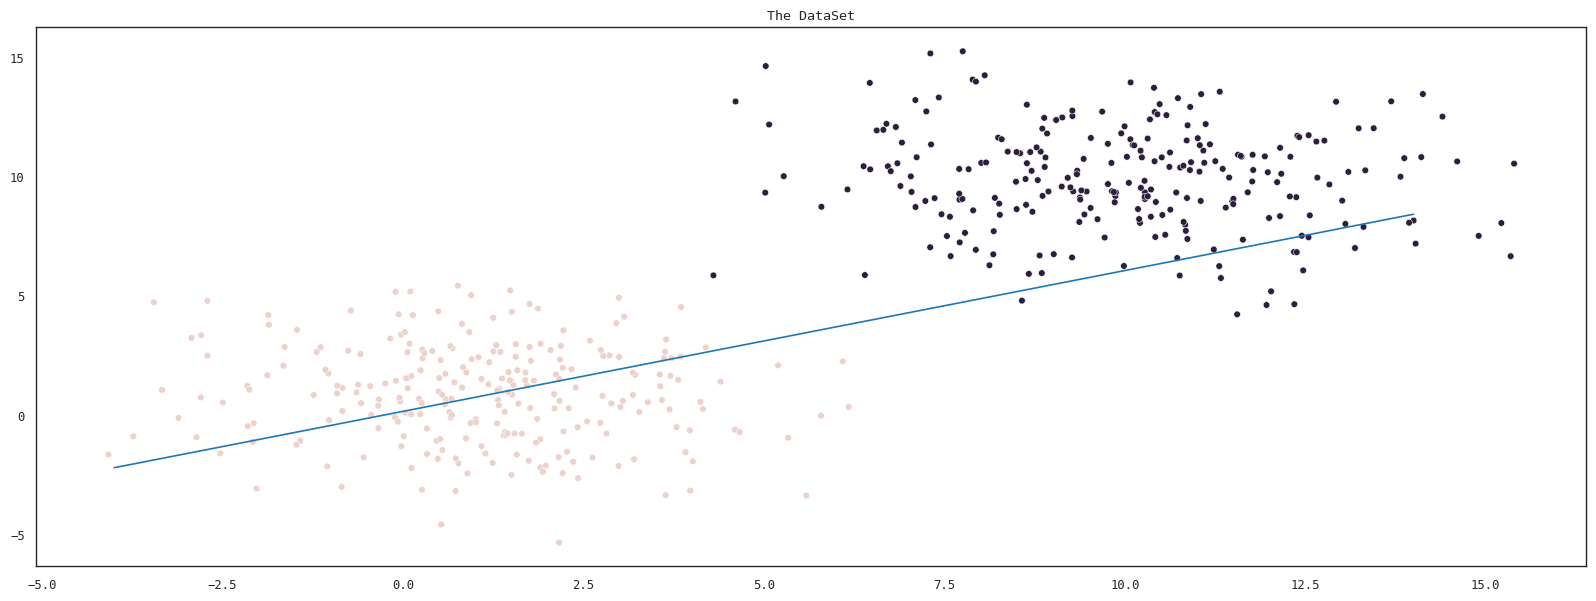

In [4]:
# plot dataset with an initial randomly guessed weights
w, w0  = np.random.normal(size=(2,)), np.random.normal()
print(f"w: {w},\nw0: {w0}")
plot_dataset(X, y, w, w0, True)

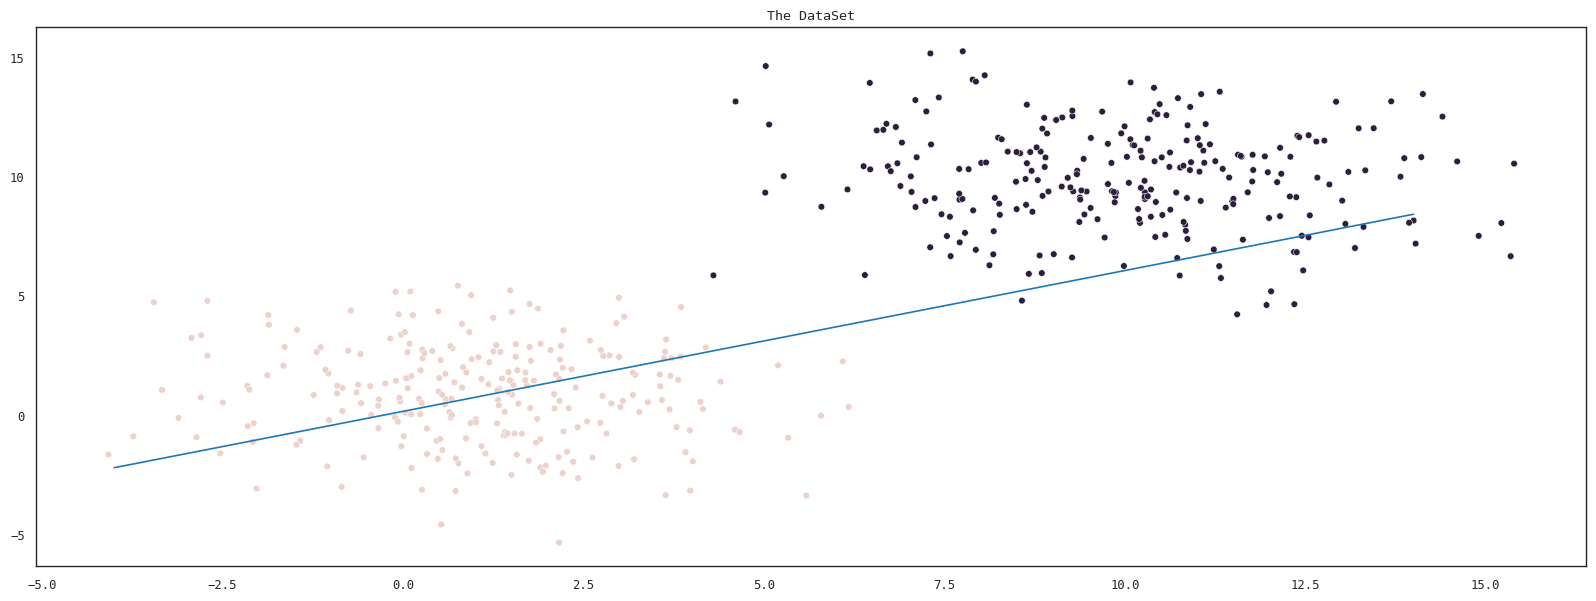

Current Accuracy: 92.0%


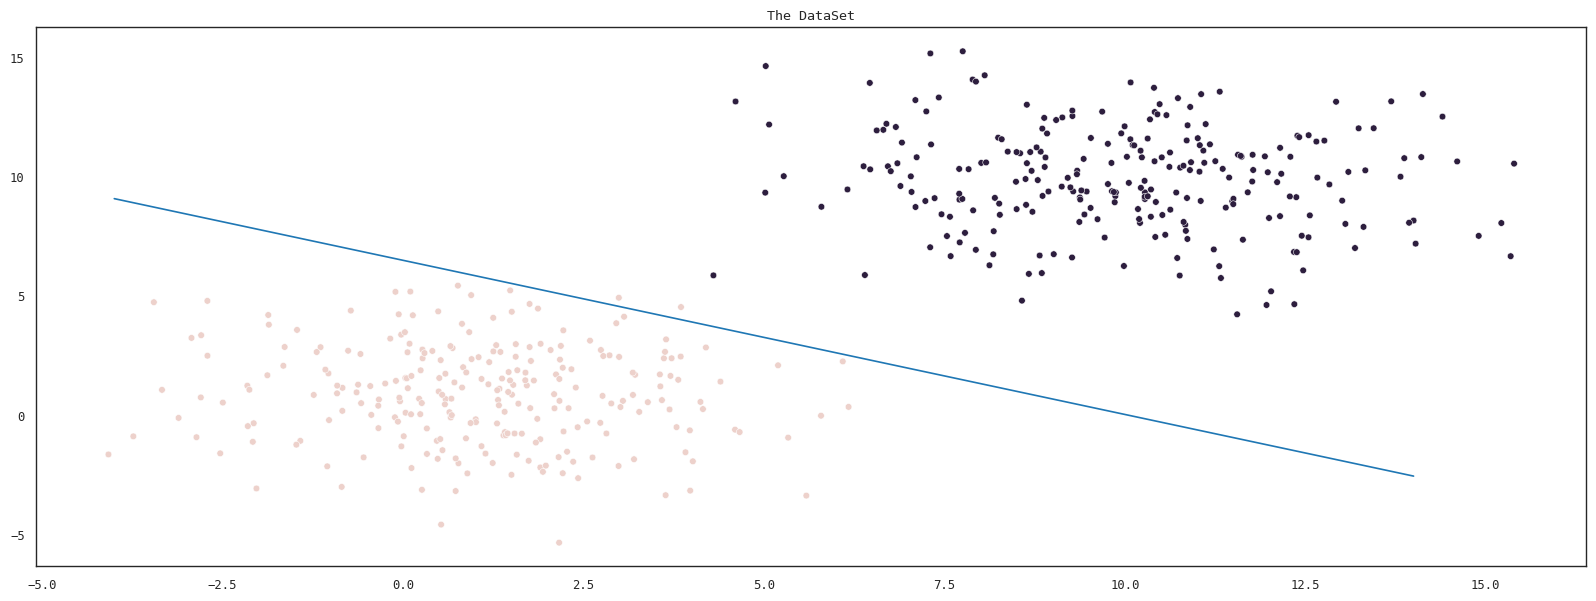

Current Accuracy: 98.4%


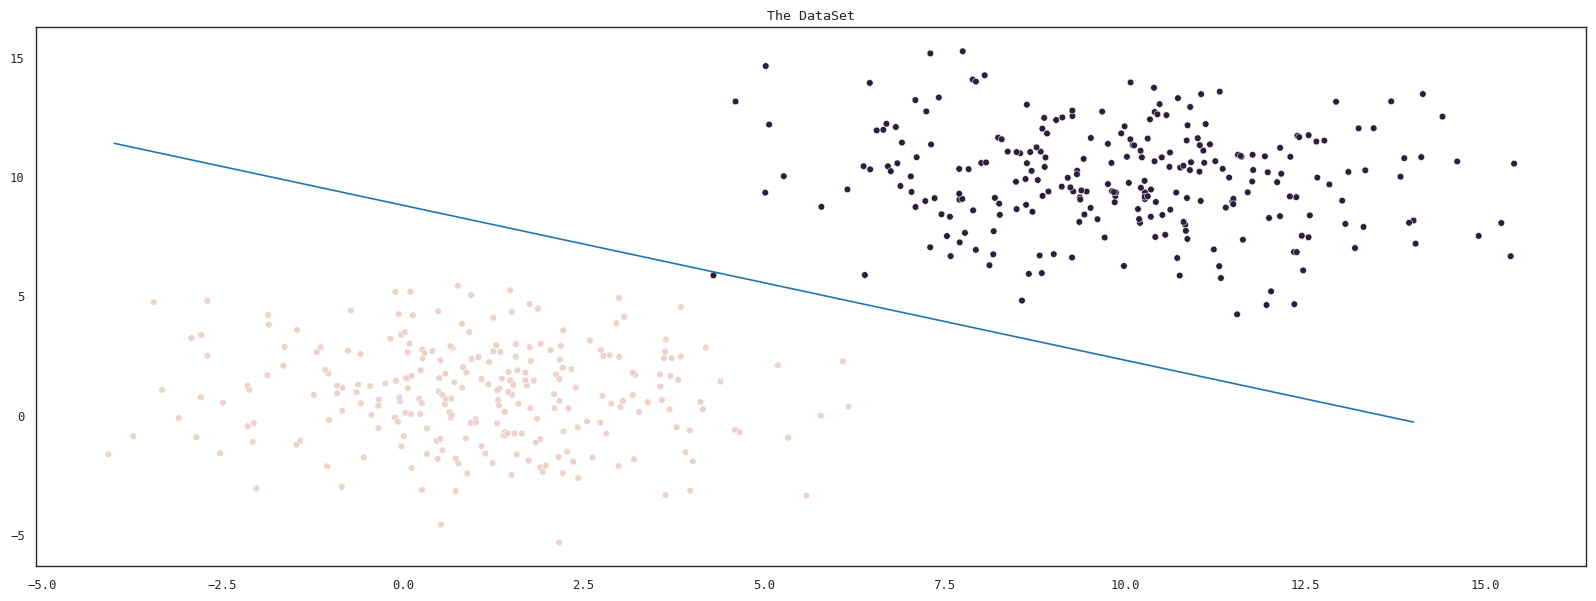

Current Accuracy: 98.8%


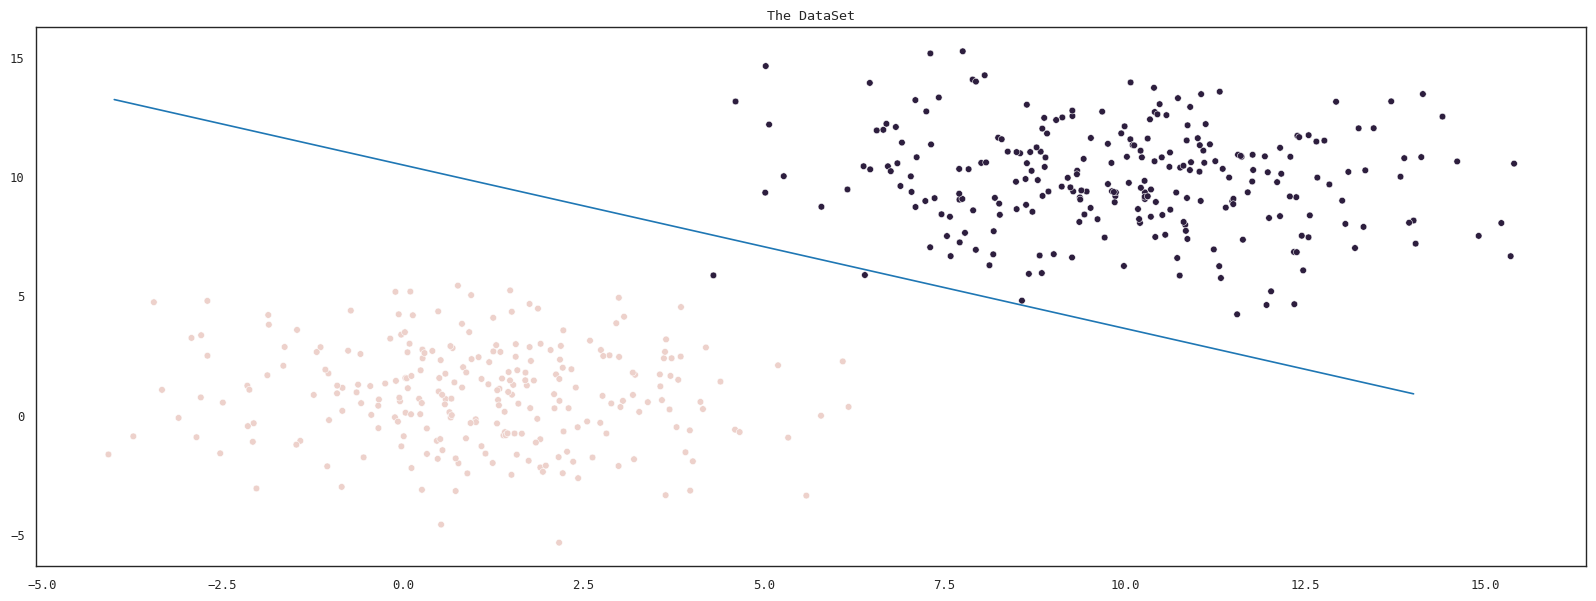

Current Accuracy: 98.0%


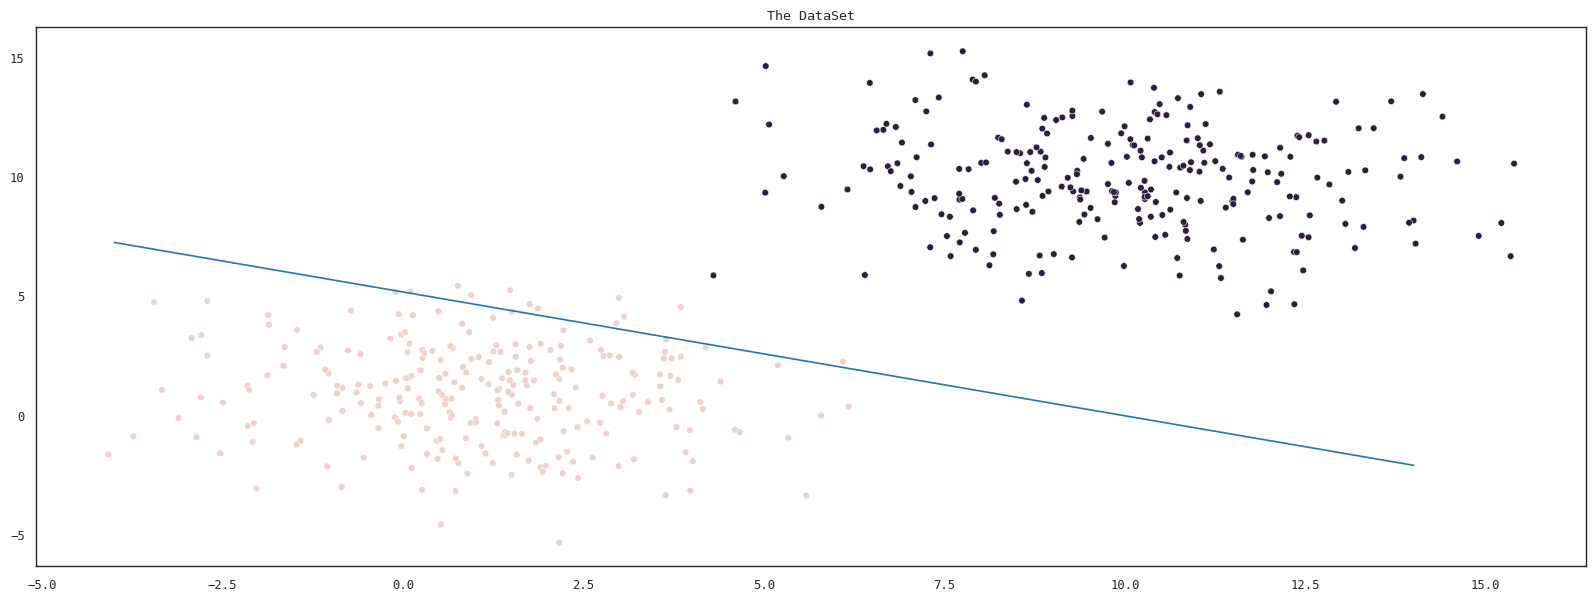

Current Accuracy: 96.6%


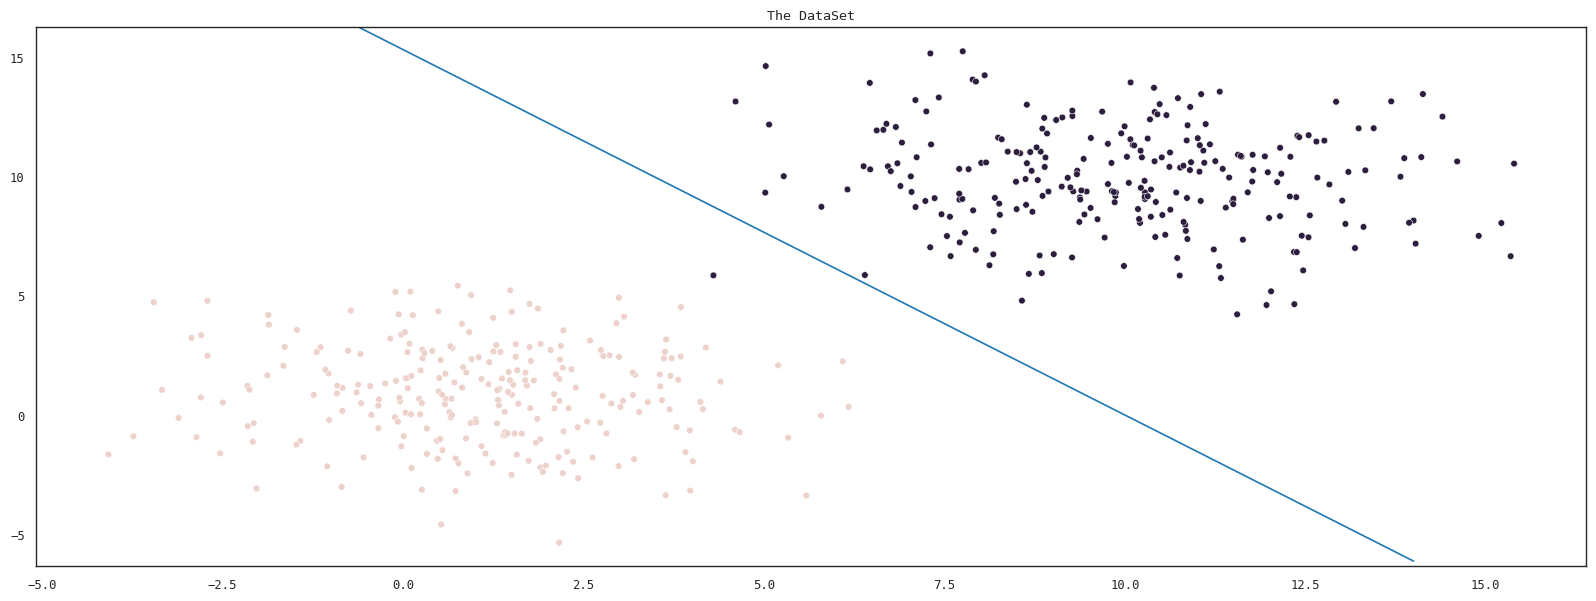

Current Accuracy: 99.6%


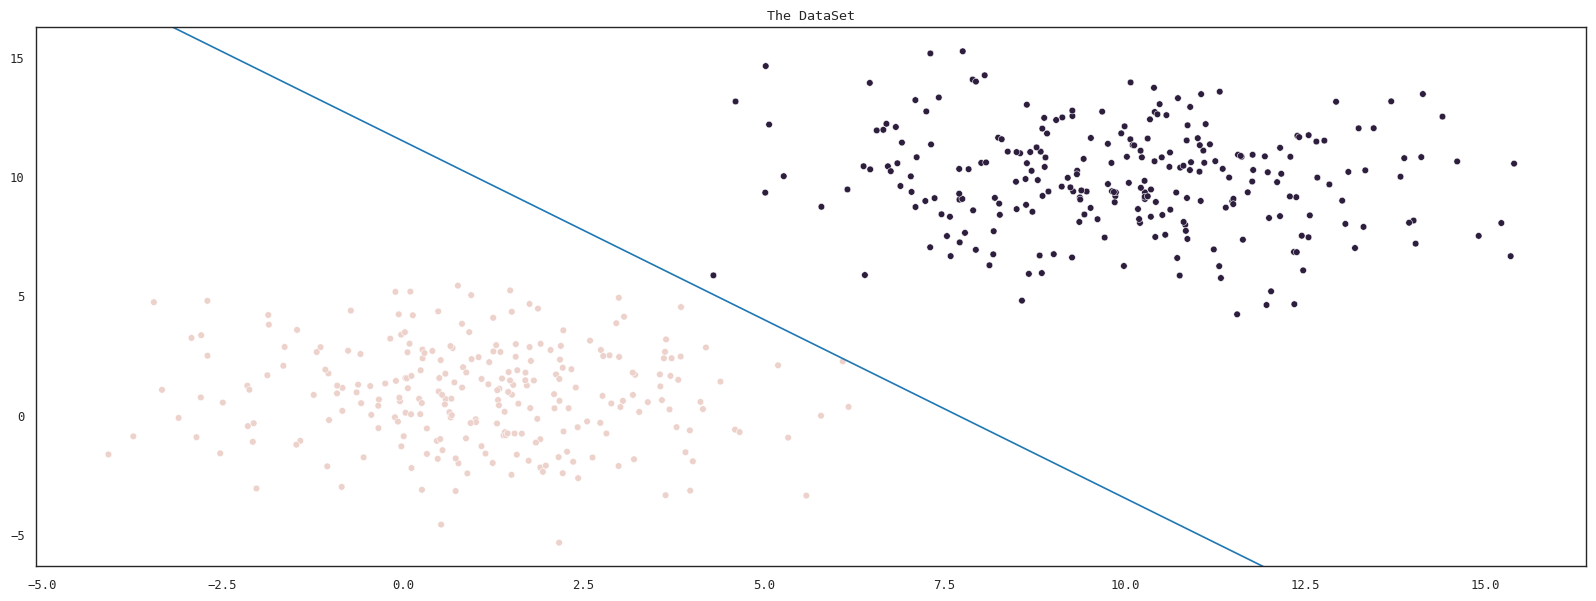

Current Accuracy: 100.0%

w_optimal: [5.62596043 3.75268729]
w0_optimal: -43.118854867842686


In [5]:
# calculate distance between a datapoint and the classifier
def calculate_distance_point_and_line(w, w0, xi):
    return (np.dot(w.T, xi) + w0) / np.linalg.norm(w)

# perceptron learning
def perceptron_learning_algorithm(w, w0, X, y, total_epochs):

    for epochs in range(total_epochs):

        num_missclassified_labels = 0

        plot_dataset(X, y, w, w0, True)
        
        for xi, yi in zip(X, y):

            predicted_label = np.sign(calculate_distance_point_and_line(w, w0, xi))

            if predicted_label != yi:

                num_missclassified_labels += 1

                w = w + (xi * yi)
                w0 = w0 + yi

        current_accuracy = 100 - (100 * num_missclassified_labels / y.shape[0])
        print(f"Current Accuracy: {current_accuracy}%")

        if num_missclassified_labels == 0:
            return w, w0
    
    return w, w0

w_optimal, w0_optimal = perceptron_learning_algorithm(w, w0, X, y, 100)
print(f"\nw_optimal: {w_optimal}\nw0_optimal: {w0_optimal}")